<a href="https://colab.research.google.com/github/trista-paul/DS-Unit-4-Sprint-2-NLP/blob/master/Trista_LS_DS_422_BOW_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import string

!pip install -U nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize # Sentence Tokenizer
from nltk.tokenize import word_tokenize # Word Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Requirement already up-to-date: nltk in /usr/local/lib/python3.6/dist-packages (3.4.1)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# 1) (optional) Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

In [16]:
job_listings = pd.read_csv('https://raw.githubusercontent.com/trista-paul/DS-Unit-4-Sprint-2-NLP/master/module2-Bag-of-Words/job_listings.csv')
job_listings = job_listings.drop(columns=['Unnamed: 0'])
job_listings.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [0]:
job_listings['description'] = job_listings['description'].str.strip("b'")

In [39]:
dlist = job_listings['description'].tolist()
len(dlist)

426

In [0]:
dlist_nohtml = []

def cleanhtml(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  cleantext = cleantext.replace(r"\n", " ")
  return cleantext

for desc in dlist:
    desc = cleanhtml(desc)
    dlist_nohtml.append(desc)

In [45]:
print(dlist_nohtml[0])
print(dlist_nohtml[1])
len(dlist_nohtml)

"Job Requirements: Conceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL/Hive or similar programming language Must show past work via GitHub, Kaggle or any other published article Master's degree in Statistics/Mathematics/Computer Science or any other quant specific field. Apply Now"
Job Description  As a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our clients navigate their healthcare jo

426

## 2) Use NLTK to tokenize / clean the listings 

In [46]:
cleaned_description = []
from string import punctuation
table = str.maketrans('', '', punctuation)
stop_words = stopwords.words('english')

for description in dlist_nohtml:
    #sep by word
    words = word_tokenize(description)

    #lowercase
    words = [word.lower() for word in words]

    #remove non alphanumeric characters
    words = [word.translate(table) for word in words]
    words = [word for word in words if word.isalpha()]

    #remove stopwords
    words = [word for word in words if not word in stop_words]
    
    #lemmatize (remove prefixes and suffixes)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    #make listing
    cleaned_description.append(words)

len(cleaned_description)

426

In [47]:
cleaned_description[0]

['job',
 'requirement',
 'conceptual',
 'understanding',
 'machine',
 'learning',
 'model',
 'like',
 'bayes',
 'kmeans',
 'svm',
 'apriori',
 'linear',
 'logistic',
 'regression',
 'neural',
 'random',
 'forest',
 'decision',
 'tree',
 'knn',
 'along',
 'handson',
 'experience',
 'least',
 'intermediate',
 'expert',
 'level',
 'coding',
 'skill',
 'pythonr',
 'ability',
 'write',
 'function',
 'clean',
 'efficient',
 'data',
 'manipulation',
 'mandatory',
 'role',
 'exposure',
 'package',
 'like',
 'numpy',
 'scipy',
 'panda',
 'matplotlib',
 'etc',
 'python',
 'dplyr',
 'tidyr',
 'r',
 'ability',
 'communicate',
 'model',
 'finding',
 'technical',
 'nontechnical',
 'stake',
 'holder',
 'hand',
 'experience',
 'sqlhive',
 'similar',
 'programming',
 'language',
 'must',
 'show',
 'past',
 'work',
 'via',
 'github',
 'kaggle',
 'published',
 'article',
 'master',
 'degree',
 'statisticsmathematicscomputer',
 'science',
 'quant',
 'specific',
 'field',
 'apply']

In [0]:
job_listings = cleaned_description

# 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [0]:
job_listings_scikit = []
for listing in job_listings:
  joined_listing = " ".join(listing)
  job_listings_scikit.append(joined_listing)

In [50]:
#vocabulary for vectorizer
text = job_listings_scikit
#bag of words
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(job_listings_scikit)

#cooresponding strings to counts
feature_names = vectorizer.get_feature_names()

#visualize count by listing in df
wordcounts = pd.DataFrame(bag_of_words.toarray(), columns=feature_names)
wordcounts.head()

,aaai,aaeeo,ab,abernathy,ability,able,abmultivariate,abounds,abroad,absence,...,zero,zeus,zf,zheng,zillow,zogsports,zone,zoom,zuckerberg,zurich
0,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4) Visualize the most common word counts

In [0]:
words_total = []
for listing in job_listings:
  for word in listing:
    words_total.append(word)

<FreqDist with 8257 samples and 134299 outcomes>


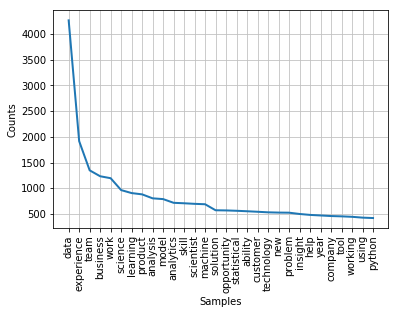

In [52]:
fdist = FreqDist(words_total)
print(fdist)
fdist.plot(30, cumulative=False)
plt.show()

 # 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [53]:
#fit a feature matrix
tfidf = TfidfVectorizer(max_features = 20)
feature_matrix = tfidf.fit_transform(text)

#cooresponding strings to frequency
feature_names = tfidf.get_feature_names()

#visualize frequency by listing in df
df = pd.DataFrame(feature_matrix.toarray(), columns=feature_names)
df.head()

,ability,analysis,analytics,business,customer,data,experience,learning,machine,model,opportunity,product,science,scientist,skill,solution,statistical,team,technology,work
0,0.540207,0.000000,0.000000,0.000000,0.000000,0.179437,0.372583,0.234686,0.255337,0.521131,0.000000,0.000000,0.219314,0.000000,0.231278,0.0,0.000000,0.000000,0.0,0.209095
1,0.107020,0.091192,0.000000,0.089876,0.242864,0.284385,0.516685,0.278961,0.303508,0.103241,0.000000,0.203363,0.173793,0.087524,0.183274,0.0,0.000000,0.402626,0.0,0.331389
2,0.198400,0.000000,0.200996,0.499851,0.000000,0.395407,0.136837,0.172385,0.187553,0.382788,0.000000,0.000000,0.161093,0.324515,0.339763,0.0,0.192864,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.417647,0.000000,0.000000,0.000000,0.000000,0.291973,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.709554,0.0,0.486678
4,0.000000,0.000000,0.457513,0.379259,0.000000,0.600026,0.311473,0.000000,0.000000,0.435658,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000


## Stretch Goals

 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.